In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load dataset
digits = datasets.load_digits()

In [2]:
#Create data and label arrays
x = digits.data
y = digits.target

#Setting a fixed rand seed so that it doesn't change every time 
np.random.seed(0)

#Split into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Text(0, 0.5, 'Accuracy')

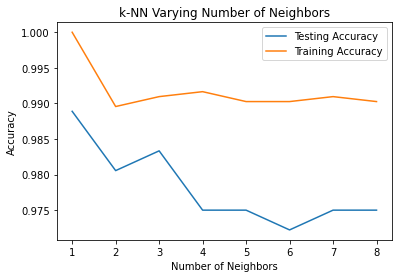

In [3]:
#Create lists to store training and testing results
kNN_test_scores, kNN_train_scores = [],[]
for i in range (1, 9):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train, y_train)
    kNN_train_scores.append(kNN.score(x_train, y_train))
    kNN_test_scores.append(kNN.score(x_test, y_test))
#Create dataframes useful for plotting and manipulating indexes
test_DF = pd.DataFrame(kNN_test_scores, columns=['KNN test scores'])
test_DF.index = np.arange(1, len(test_DF)+1)
train_DF = pd.DataFrame(kNN_train_scores, columns=['KNN train scores'])
train_DF.index = np.arange(1, len(test_DF)+1)

#Plotting the results
plt.plot(test_DF, label='Testing Accuracy')
plt.plot(train_DF, label='Training Accuracy')
plt.legend()
plt.title('k-NN Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [4]:
#Which K is the best?
#After seeding the rand before splitting the data, the best fit will be a k 
#value that is low for the training data and high for the testing data for the
#best fit
#Therefore k=2 and k=3 seem to be good contenders so k=3 will be chosen as the
#best fit. 

In [5]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(x_train, y_train)
y_pred = linear_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.97      0.95      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
poly_svm = SVC(kernel='poly')
poly_svm.fit(x_train, y_train)
y_pred = poly_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [7]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(x_train, y_train)
y_pred = rbf_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Text(33.0, 0.5, 'True Label')

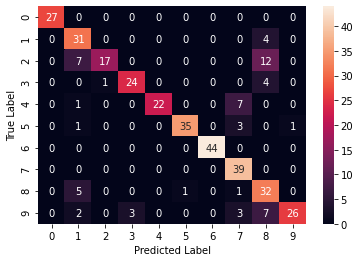

In [8]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)
y_pred = bayes.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Test Scores:
Bayes: 82.50 %
Linear SVM: 97.78 %
Poly SVM: 98.89 %
RBF SVM: 99.17 %
kNN (k=3): 98.33 %


Text(0.5, 1.0, 'Comparing Accuracy of Different Classifiers')

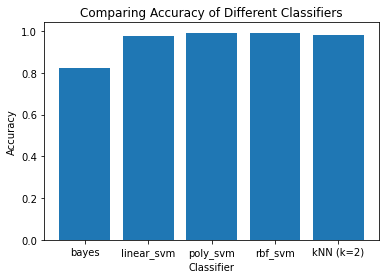

In [9]:
groups = ['bayes', 'linear_svm', 'poly_svm', 'rbf_svm', 'kNN (k=2)']
accuracies = []
bayes_accuracy = bayes.score(x_test, y_test)
linear_accuracy = linear_svm.score(x_test, y_test)
poly_accuracy = poly_svm.score(x_test, y_test)
rbf_accuracy = rbf_svm.score(x_test, y_test)

accuracies.append(bayes_accuracy)
accuracies.append(linear_accuracy)
accuracies.append(poly_accuracy)
accuracies.append(rbf_accuracy)
accuracies.append(kNN_test_scores[2])

print("Test Scores:")
print("Bayes:", "{:.2f}".format(bayes_accuracy*100),"%")
print("Linear SVM:", "{:.2f}".format(linear_accuracy*100),"%")
print("Poly SVM:", "{:.2f}".format(poly_accuracy*100),"%")
print("RBF SVM:", "{:.2f}".format(rbf_accuracy*100),"%")
print("kNN (k=3):", "{:.2f}".format(kNN_test_scores[2]*100),"%")

plt.bar(groups, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title('Comparing Accuracy of Different Classifiers')

In [10]:
#As can be seen above, for this split of the data the best classifier seems to 
#be the rbf SVM model since it has the highest accuracy at 99.17%

In [11]:
#Load the gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

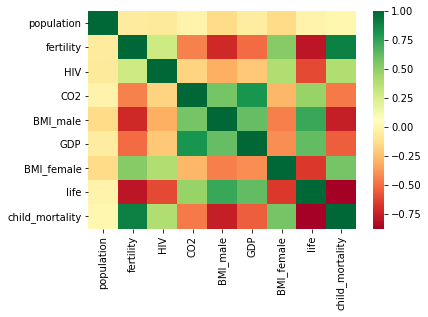

In [12]:
sns.heatmap(df.corr(), cmap='RdYlGn')

0.6192442167740035


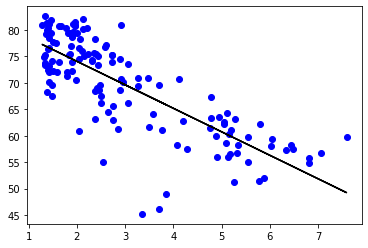

In [13]:
import warnings; warnings.simplefilter('ignore')

x = df['fertility']
y = df['life']

regression = LinearRegression()
#Running with only fit(x, y) will give error 
#This is because its only a 1D array and it needs 2D array
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fix, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

0.8978171883856773
population                 1197070109
fertility                        7.59
HIV                              25.9
CO2                         48.702062
BMI_male                     28.45698
GDP                            126076
BMI_female                    135.492
life                             82.6
child_mortality                 192.0
Region             Sub-Saharan Africa
dtype: object


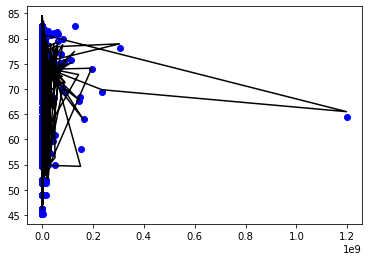

In [14]:
X = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = df['life']
regression.fit(X, y)
print(regression.score(X, y))
#Outlier cause by population
print(df.max())
fix = plt.plot(X, y, 'bo', X, regression.predict(X), '-k')

In [15]:
cross_val_score(regression, x[:, None], y, cv=5)

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [16]:
#Load creditcard
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


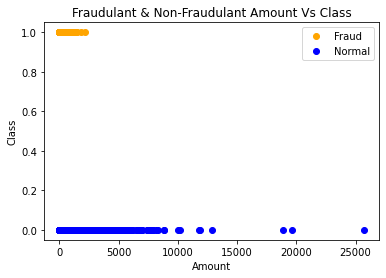

In [17]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
frauds

plt.plot(frauds.Amount, frauds.Class, 'o', color='orange', label='Fraud')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color='blue', label='Normal')
plt.xlabel("Amount")
plt.ylabel("Class")
plt.title("Fraudulant & Non-Fraudulant Amount Vs Class")
plt.legend()

[[284156    159]
 [   151    341]]


Text(0.5, 1.0, 'Credit Card True Label Vs Predicted Label')

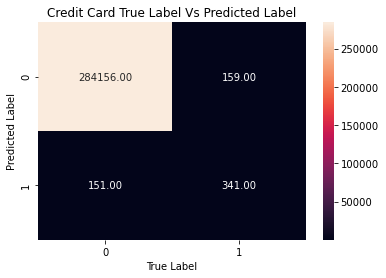

In [18]:
#Logistic Regression 
X = df.drop('Class', axis=1)
y = df.Class
#Heatmap
log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='.2f')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Credit Card True Label Vs Predicted Label')